**Due: 4 PM on Wednesday, 13 Apr 2016**

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

For this exercise, the most important grading criteria is how much your optimizations improved run-times.

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc. is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

**Exercise 1 (100 points)**

The code given below performs a stochastic gradient descent to fit a quadratic polynomila to $n$ data points. Maake the code run faster by:

1. Using vectorization on numpy arrays (20 points)
1. Using `numba` JIT  (20 points)
1. using `Cython` (20 poits)
1. Rewrite the `sgd` function in C or C++ and wrap for use in Python (40 points)

Replace the code stubs below with your otpimized code. Reprot the ratio optimized_time/original_time for each of the four parts.

In [99]:
def sgd(b, x, y, max_iter, alpha):
    for i in range(max_iter):
        n = len(y)
        idx = np.arange(n)
        np.random.shuffle(idx)    
        for j in idx:
            b[0] -= alpha * (2*(b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[1] =- alpha * (2*x[j] * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
            b[2] -= alpha * (2*x[j]**2 * (b[0] + b[1]*x[j] + b[2]*x[j]**2 - y[j]))
    return b

In [100]:
n = 10000
x = np.linspace(0, 10, n)
y = 2*x**2 + 6*x + 3 + np.random.normal(0, 5, n)
k = 100
alpha = 0.0001
b0 = np.random.random(3)

In [101]:
%%time
np.random.seed(123)
b = sgd(b0, x, y, k, alpha)
print(b)

[  1.41078095e+01   6.21023648e-03   2.46339669e+00]
CPU times: user 9.62 s, sys: 11.5 ms, total: 9.63 s
Wall time: 9.63 s


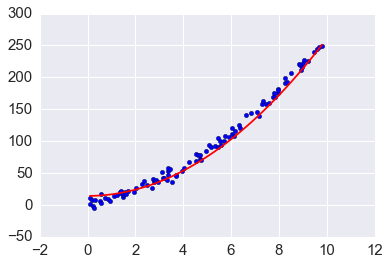

In [102]:
yhat = b[0] + b[1]*x+ b[2]*x**2
idx = sorted(np.random.choice(n, 100))
plt.scatter(x[idx], y[idx])
plt.plot(x[idx], yhat[idx], c='red')
pass

### Using vectorization

In [103]:
def sgd_vec(b, x, y, max_iter, alpha):
    return np.zeros(3)

In [104]:
%%time
np.random.seed(123)
b = sgd_vec(b0, x, y, k, alpha)
print(b)

[ 0.  0.  0.]
CPU times: user 636 µs, sys: 64 µs, total: 700 µs
Wall time: 669 µs


#### Speed-up ratio

### Using numba JIT

In [105]:
def sgd_numba(b, x, y, max_iter, alpha):
    return np.zeros(3)

In [106]:
%%time
b = sgd_numba(b0, x, y, k, alpha)
print(b)

[ 0.  0.  0.]
CPU times: user 652 µs, sys: 119 µs, total: 771 µs
Wall time: 729 µs


#### Speed-up ratio

### Using Cython

In [107]:
def sgd_cython(b, x, y, max_iter, alpha):
    return np.zeros(3)

In [108]:
%%time
np.random.seed(123)
b = sgd_cython(b0, x, y, k, alpha)
print(b)

[ 0.  0.  0.]
CPU times: user 660 µs, sys: 89 µs, total: 749 µs
Wall time: 697 µs


#### Speed-up ratio

### Using C or C++

In [109]:
def sgd_wrap(b, x, y, max_iter, alpha):
    return np.zeros(3)

In [110]:
%%time
np.random.seed(123)
b = sgd_wrap(b0, x, y, k, alpha)
print(b)

[ 0.  0.  0.]
CPU times: user 662 µs, sys: 80 µs, total: 742 µs
Wall time: 689 µs


#### Speed-up ratio